## Lab 4

## imports libs and connnect to databases

In [17]:
import pandas
import configparser
import psycopg2

In [18]:
config = configparser.ConfigParser()
config.read('config.ini')

host = config['myaws']['host']
db=config['myaws']['db']
user=config['myaws']['user']
pwd=config['myaws']['pwd']

In [19]:
conn = psycopg2.connect(
                        host = host,
                        user = user,
                        password = pwd,
                        dbname=db
                        )

In [20]:
cur=conn.cursor()

## q1

In [28]:
sql_q1 = """
            select * from gp29.student
            """

In [29]:
df = pandas.read_sql_query(sql_q1,conn)
df[:]

,s_email,s_name,major
0,s1@jmu.edu,s1,IA
1,s5@jmu.edu,s5,GS


## q2

In [38]:
sql_q2 = """
        select gp29.professor.p_name,
        gp29.course.c_name
        from gp29.professor
        inner join gp29.course
        on gp29.professor.p_email = gp29.course.p_email
            
        """

In [39]:
df = pandas.read_sql_query(sql_q2,conn)
df[:]

,p_name,c_name
0,Kathleen Moore,technology applied
1,Ron Raab,awareness of wmd
2,Noel Hendrickson,counterfactual
3,new_p,new_c_name
4,new_p,data mining


## q3

In [40]:
sql_q3 = """
        select c_number,
        count(c_number) as enrolled
        from gp29.enroll_list
        group by c_number
        order by enrolled desc
        """

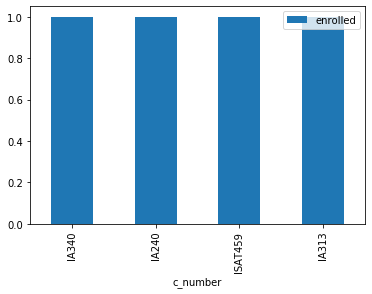

In [42]:
df = pandas.read_sql_query(sql_q3,conn)
df.plot.bar(y='enrolled', x='c_number')

## q4

In [45]:
sql_q4 = """
        select gp29.professor.p_name,
        count(gp29.course.c_name) as teaching_number
        from gp29.professor 
        inner join gp29.course
        on gp29.professor.p_email = gp29.course.p_email
        group by professor.p_name
        order by teaching_number desc
        """

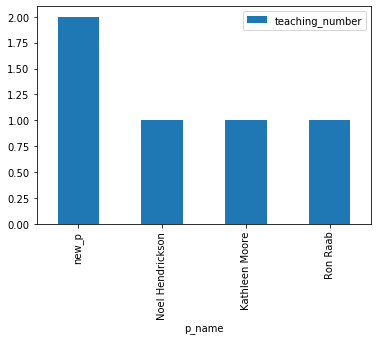

In [46]:
df = pandas.read_sql_query(sql_q4,conn)
df.plot.bar(y='teaching_number', x='p_name')

## q5

In [54]:
sql_q5_professor = """
                    insert into gp29.professor(p_email,p_name,office)
                    values('{}','{}','{}')
                    """.format('new_p@jmu.edu','new_p','new_office')

In [55]:
cur.execute(sql_q5_professor)

InternalError: current transaction is aborted, commands ignored until end of transaction block


In [56]:
conn.commit()

In [57]:
df=pandas.read_sql_query('select * from gp29.professor',conn)
df[:]

,p_email,p_name,office
0,hendrinx@jmu.edu,Noel Hendrickson,n/a
1,moore8ka@jmu.edu,Kathleen Moore,ISAT116
2,raabrw@jmu.edu,Ron Raab,ISAT156
3,nenw_p@jmu.edu,new_p,new_office
4,new_p@jmu.edu,new_p,new_office


In [67]:
sql_q5_course = """
                    insert into gp29.course(c_number,c_name,p_email)
                    values('{}','{}','{}')
                    """.format('gs_new','new_c_name','online','new_p@jmu.edu')

In [68]:
cur.execute(sql_q5_course)

IntegrityError: insert or update on table "course" violates foreign key constraint "course_p_email_fkey"
DETAIL:  Key (p_email)=(online) is not present in table "professor".


In [69]:
cur.execute('ROLLBACK')

In [70]:
conn.commit()

In [63]:
df=pandas.read_sql_query('select * from gp29.course',conn)
df[:]

,c_number,c_name,r_number,p_email
0,IA240,technology applied,online,moore8ka@jmu.edu
1,ISAT459,awareness of wmd,online,raabrw@jmu.edu
2,IA313,counterfactual,online,hendrinx@jmu.edu
3,ia_new,new_c_name,online,new_p@jmu.edu
4,IA340,data mining,online,new_p@jmu.edu


## q6

In [64]:
sql_q6_course = """
                update gp29.course
                set p_email = '{}'
                where p_email = '{}'
                """.format('new_p@jmu.edu','hendrinx@jmu.edu')

In [71]:
cur.execute(sql_q6_course)

In [72]:
df=pandas.read_sql_query('select * from gp29.course',conn)
df[:] 

,c_number,c_name,r_number,p_email
0,IA240,technology applied,online,moore8ka@jmu.edu
1,ISAT459,awareness of wmd,online,raabrw@jmu.edu
2,ia_new,new_c_name,online,new_p@jmu.edu
3,IA340,data mining,online,new_p@jmu.edu
4,IA313,counterfactual,online,new_p@jmu.edu


In [73]:
sql_q6_professor = """
                delete from gp29.professor 
                where p_email = '{}'
                """.format('hendrinx@jmu.edu')

In [74]:
cur.execute(sql_q6_professor)

In [75]:
conn.commit()

In [76]:
df=pandas.read_sql_query('select * from gp29.professor',conn)
df[:]

,p_email,p_name,office
0,moore8ka@jmu.edu,Kathleen Moore,ISAT116
1,raabrw@jmu.edu,Ron Raab,ISAT156
2,nenw_p@jmu.edu,new_p,new_office
3,new_p@jmu.edu,new_p,new_office


## close connection

In [77]:
cur.close()
conn.close()